Internet Resources:

[Python Programming.net - machine learning episodes 20-33](https://pythonprogramming.net/support-vector-machine-intro-machine-learning-tutorial/)  
[MIT OpenCourseWare 16 Machine Learning: Support Vector Machines](https://www.youtube.com/watch?v=_PwhiWxHK8o)  
[Victor Lavrenko - IR20.6 Sequential minimal optimization (SMO)](https://www.youtube.com/watch?v=I73oALP7iWA)


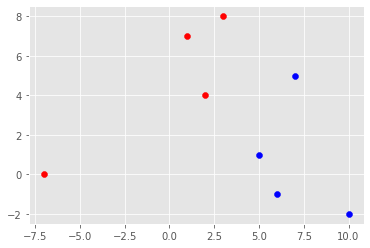

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math

style.use("ggplot")

# we create our own data

# features
samples_x = [
    [1,7],
    [2,4],
    [3,8],
    [5,1],
    [6,-1],
    [7,5],
    [10,-2],
    [-7,0]
]

# classes/labels
samples_y = [1,1,1,-1,-1,-1, -1, 1]

[plt.scatter(xi[0], xi[1], color = "r" if yi == 1 else "b") for xi, yi in zip(samples_x, samples_y)]
plt.show()

Quick explaination of a SVM:
======
A support vector machine is a supervised machine learning algorithm that can be used for classification and regression. In this example we'll stick to classifaction.
It works by finding the hyperplane (a plane with dimensions n-1 in a space of dimension n) which best divides the training dataset into its different classes while maximizing the distance of the dataset to the plane. The left graph shows a bunch of different hyperplanes, while the right picture shows the optimal hyperplane for this datset. The dotted lines are called support vectors.
<table><tr><td><img src=https://miro.medium.com/max/300/0*9jEWNXTAao7phK-5.png width="350"></td><td><img src=https://miro.medium.com/max/300/0*0o8xIA4k3gXUDCFU.png width="350"></td></tr></table>

So essentially this is a constrained optimization problem where we want to maximze the width between the support vectors.   
<br>

The Math behind the SVM:
===
In this problem we will only consider linearly separable data with two classes: Positive(+) & Negative(-)
<br>
<br>
### Descision Rule ###
The normal equation of the hyperplane is:  
$$\vec{x} \cdot \vec{w} = \vec{b} \iff \vec{x} \cdot \vec{w} - \vec{b} = 0$$
where $\vec{w}$ is the normal vector of the plane, $\vec{x}$ is some point in the plane and $\vec{b}$ is some offset (otherwise the plane would always go through the origin).  
Given some query $\vec{x_*}$, we can easily calculate on which side of the hyperplane it is i.e. which class it belongs to:
$$
\begin{align}
\vec{x_*} \cdot \vec{w} &- \vec{b} > 0 \implies \vec{x_*} \in + \\
\vec{x_*} \cdot \vec{w} &- \vec{b} < 0 \implies \vec{x_*} \in -
\end{align}
$$

### Support Vectors ###
For each sample $\vec{x_i}$ in our training data we demand:  
$$ \mid \vec{x_i} \cdot \vec{w} - \vec{b} \mid \, \geq 1 $$
This ensures that ${\left\|w\right\|}$ is related to the margin, that is the size of the gap between support vectors. Furthermore for the the data points that lie on the support vectors i.e. the points nearest to the plane we want
$$ \mid \vec{x_i} \cdot \vec{w} - \vec{b} \mid \, = 1 $$
which actually holds two equations
$$ 
\begin{align}
\vec{x_i} \in + \implies \vec{x_i} \cdot \vec{w} & - \vec{b} = 1 \\
\vec{x_i} \in - \implies \vec{x_i} \cdot \vec{w} & - \vec{b} = -1 \\
\end{align}
$$
To make this more easier to deal with we'll introduce another vairable $y_i$ which will just hold the value of whatever class $\vec{x_i}$ is:
$$y_i = 
\begin{cases}
+1,& \text{if } \vec{x_i} \in + \\
-1,& \text{else if } \vec{x_i} \in -
\end{cases}
$$
With this we can express the above in one equation
$$
\begin{align}
y_i(\vec{x_i} \cdot \vec{w} &- \vec{b}) -1 \, \geq 0 \;\; \text{for all } \vec{x_i} \\
y_i(\vec{x_i} \cdot \vec{w} &- \vec{b}) -1 \, = 0 \;\; \text{for support vectors} \tag{1}
\end{align}
$$

### Margin ###
The Margin, can be calculated as:
$$ 
\text{Margin} = \left(\vec{x_+}-\vec{x_-}\right) \cdot \frac{\vec{w}}{\left\|w\right\|} = 
\frac{\vec{x_+} \cdot \vec{w} - \vec{x_-} \cdot \vec{w}}{\left\|w\right\|}
$$
where $\vec{x_+} \in +$ and  $\vec{x_-} \in -$ are samples in the training set that lie on the support vectors and $\frac{\vec{w}}{\left\|w\right\|}$ is the unit normal vector.  
With (1) evaluated for $\vec{x_+}$ and $\vec{x_-}$
$$
\begin{align}
&y_+(\vec{x_+} \cdot \vec{w} - \vec{b}) -1 = \vec{x_+} \cdot \vec{w} - \vec{b} -1 = 0 \implies \vec{x_+} \cdot \vec{w} = 1+b \\
&y_-(\vec{x_-} \cdot \vec{w} - \vec{b}) -1 = -\vec{x_-} \cdot \vec{w} + \vec{b} -1 = 0 \implies \vec{x_-} \cdot \vec{w} = -1+b
\end{align}
$$
we have 
$$ \text{Margin} = \frac{1+b-(-1+b)}{\left\|w\right\|}=\frac{2}{\left\|w\right\|}$$
So if we want to maximize the margin, we need to minimize $\left\|w\right\|$.  
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/1024px-SVM_margin.png width="350">
<br>

### Problem formulation ###
This is a constrained optimization problem:
We want to minimze 
$$ \frac{1}{2} \left\|\vec{w}\right\|^2$$
such that 
$$ y_i(\vec{x_i} \cdot \vec{w} - \vec{b}) -1 \geq 1 \iff  y_i(\vec{x_i} \cdot \vec{w} - \vec{b}) \geq 0$$  
The reason why we are saying we want to minimze $ \frac{1}{2} \left\|\vec{w}\right\|^2$ instead of $\left\|w\right\|$ is that this makes things nicer to compute later on.  
<br>
Using the method of [lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier) gives us the **primal form** of this problem
(if you dont know what the lagrangian or lagrange multipliers are, [this](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/lagrange-multipliers-and-constrained-optimization/v/constrained-optimization-introduction) video series from will give you an intuitive introduction) 
$$ \underset {w, b}{\operatorname {arg\,max} } \ L_p(w,b)=\frac{1}{2} \left\|\vec{w}\right\|^2 - \sum \alpha_i \left[ y_i \left(\vec{x_i} \cdot \vec{w} - \vec{b} \right) -1 \right]$$
<br>
where the $\alpha_i$ are lagrange multipliers. Setting $\nabla L = 0$ gives us  
<br>
$$
\begin{align}
\frac{\partial L}{\partial w} &= \vec{w}- \sum \alpha_i y_i \vec{x_i} = 0  \iff \vec{w} = \sum \alpha_i y_i \vec{x_i} \\
\frac{\partial L}{\partial b} &= \sum \ \alpha_i y_i = 0 
\end{align}
$$
Plugging these back in to $L_p$  
$$
\begin{align}
L_p(w,b) &=\frac{1}{2} \left\|\vec{w}\right\|^2 - \sum \alpha_i \left[ y_i \left(\vec{x_i} \cdot \vec{w} - \vec{b} \right) -1 \right] 
\\[7pt]
&= \frac{1}{2} \left(\sum \alpha_i y_i \vec{x_i}\right)^2-   \sum \alpha_i \left[ y_i \left(\vec{x_i} \left(\sum \alpha_j y_j \vec{x_j}\right) - b \right) - 1\right] 
\\[7pt]
&= \frac{1}{2}\left(\sum \alpha_i y_i \vec{x_i}\right)\left(\sum \alpha_j y_j \vec{x_j}\right)   -   \sum \alpha_i y_i \vec{x_i} \left(\sum \alpha_j y_j \vec{x_j}\right)    - \left(\sum \alpha_i y_i b \right)    + \sum \alpha_i 
\\[7pt]
&= \frac{1}{2}\sum_{i}\sum_{j}\alpha_i\alpha_j y_i y_j \left(\vec{x_i} \cdot \vec{x_j} \right) - \frac{1}{2}\sum_{i}\sum_{j}\alpha_i\alpha_j y_i y_j \left(\vec{x_i} \cdot \vec{x_j} \right)  + \sum \alpha_i 
\\[7pt]
=L_d(\alpha) &= \sum \alpha_i - \frac{1}{2}\sum_{i}\sum_{j}\alpha_i\alpha_j y_i y_j \left(\vec{x_i} \cdot \vec{x_j} \right)
\end{align}
$$
This reformulation is called the **dual problem**. This is a convex optimization problem which can be solved by quadratic programing.  
<br>

### Optimization (SMO) ###
Lets look at whats actually going on when we are changing our $\alpha_i's$. Lets Consider $\vec{w}$:
$$ \vec{w} = \sum \alpha_i y_i x_i = \underbrace{\sum \alpha^+_i \ x_i^+}_{h^+} - \underbrace{\sum \alpha^-_i \ x_i^-}_{h^-}$$
where $x_i^+ \in + $ and $x_i^- \in -$. The superscript on $\alpha_i$ just denotes if it belongs to a positive or negative class. Other than that it doestn have any mathematical meaning.  
$h^+$ and $h^-$ are weighted averages of their respective classes, where the $\alpha_i's$ are the weights. By changing the $\alpha_i's$ we can move $h^\pm$ around in the polytope created by its respective class. The SVM will be optimized when $h^+$ and $h^-$ are closest. In this case almost all $\alpha's$ will be zero except for those that belong to values on the support vectors. Of course $h^+$ and $h^-$ are not allowed to exist outside of their polytopes, so we will need to restrict the weights. With this our objective is:
Minimize 
$$ \text{Minimize}\left\|h^+-h^-\right\| \text{  s.t.  } \alpha_i \geq 0 \text{ and } \sum\alpha_i^+=\sum\alpha_i^-=1 $$
**This is how to do it:**  
 Repeat until optimized i.e. $h^+$ and $h^-$ cannot move any closer
- 1: Pick two alphas from the same class:
$$\text{Without loss of generality: }\alpha_j \text{, } \alpha_k \in +$$
- 2: Change them as follows
$$
\begin{align}
&c = \alpha_j + \alpha_k \\
&\alpha_j' = \frac{(x_j-x_k)\cdot \left(h^--h^++cx_k+\alpha_j x_j + \alpha_k x_k\right)}{\|x_j-x_k\|^2}\\
&\alpha_k' = c - \alpha_j'
\end{align}
$$

**How it works:**

$\left\|h^+ - h^-\right\|$ can be viewed as a (fairly easy) geometric problem
$$
\begin{align}
\left\|h^+ - h^-\right\| &= \Bigg\| \sum \alpha^+_i x_i^+ - \sum \alpha^-_i x_i^-\Bigg\| 
\\
&= \Bigg\| \alpha_jx_j+\alpha_kx_k+\sum_{i \neq j,k} \alpha^+_i \ x_i^+ - \sum \alpha^-_ix_i^- \Bigg\| 
\\
&= \Bigg\| \alpha_jx_j+(\underbrace{c}_{\alpha_j+\alpha_k}-\alpha_j)x_k+\sum_{i \neq j,k} \alpha^+_i \ x_i^+ - \sum \alpha^-_ix_i^- \Bigg\| 
\\
&= \Bigg\| \underbrace{\alpha_j}_{a} \underbrace{(x_j-x_k)}_{\vec{x}} + \underbrace{cx_k + \sum_{i \neq j,k} \alpha_i^+ x_i^+}_{\vec{u}}-\underbrace{\sum\alpha_ix_i}_{\vec{h}}\Bigg\| 
\\
&=\left\|a\vec{x}+\vec{u}-\vec{h} \right\| \equiv \left\| g-\vec{h} \right\|
\end{align}
$$
<br>
where $g:\vec{u}+a\vec{x}$ is the line in $\vec{x}$ direction that passes through $\vec{u}$.The distance between $g$ and $\vec{h}$ is minimal at the point on the line where 
$$
\begin{align}
g-\vec{h} \perp \vec{x} &\implies (g-\vec{h})\cdot\vec{x}=\vec{x}\cdot\vec{u}+a\vec{x}\cdot\vec{x}-h\vec{x}=0 \\
&\implies a = \frac{\vec{x}\cdot(\vec{h}-\vec{u})}{\|x\|^2}
\end{align}
$$
<br>
Plugging everything we get our formula for $\alpha_j'$
$$
\begin{align}
\alpha_j' &= \frac{(x_j-x_k)\cdot \bigg(\overbrace{\sum \alpha^-_i x_i^-}^{h^-}-\bigg(cx_k + \overbrace{\sum_{i \neq j,k} \alpha_i^+ x_i^+}^{h^+-\alpha_jx_j-\alpha_kx_k}\bigg)\bigg)}{\|x_j-x_k\|^2} 
\\[7pt]
&=\frac{(x_j-x_k)\cdot \left(h^--\left(c x_k + h^+-\alpha_jx_j-\alpha_kx_k\right)\right)}{\|x_j-x_k\|^2} 
\\[7pt]
&= \frac{(x_j-x_k)\cdot \left(h^--h^++cx_k+\alpha_j x_j + \alpha_k x_k\right)}{\|x_j-x_k\|^2}
\end{align}
$$
<br>
Once we have $\alpha_j'$ its very simple to calculate $\alpha_k'$ since $\alpha_j + \alpha_k \overset{!}{=} \alpha_j' + \alpha_k'$ otherwise $\sum \ \alpha_i y_i \ne 0$:
$$
\begin{align}
\\
\alpha_k' &= (\alpha_j + \alpha_k) - \alpha_j' \\
&= c - \alpha_j'
\end{align}
$$

iteration 0: h+ & h- distance:  4.024922359499621
iteration 1: h+ & h- distance:  4.024922359499621
(0, 7, 9.0)


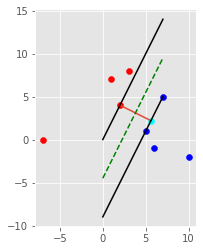

In [2]:
# this SVM is a linear hard margin classifier which means it can only deal with linearly separable data
# it can only deal with two features 
class SVM:
    def __init__(self):
        # initialize with some random values
        self.b = 0
        self.w = [0,0]
        # for visualization later
        self.colors = {1:'r',-1:'b'}
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(1,1,1)
        
    def fit(self, x, y, error = 0):
        self.xs = x # training data features
        self.ys = y # training data classes
        
        # split data into classes
        x_pluses = []
        x_minuses = []
        for xi, yi in zip(self.xs, self.ys):
            if yi==1: x_pluses.append(xi)
            elif yi == -1: x_minuses.append(xi)
        # convert to numpy arrays for doing calculations
        x_pluses = np.array(x_pluses)
        x_minuses = np.array(x_minuses)
        
        # initialize alphas to all have the same values
        alpha_pluses = [1 / len(x_pluses) for _ in x_pluses]
        alpha_minuses = [1 / len(x_minuses) for _ in x_minuses]
        
        # initialize h^- and h^+
        h_minus = np.dot(alpha_minuses, x_minuses)
        h_plus = np.dot(alpha_pluses, x_pluses)
        
        # this function performs our optimization steps. it optimizes two alphas of the same class per step
        def optimize(j, k, alphas, xs, h_opt, h_const):
          # parameters:
            # j, k: indicies of the alphas to be optimized
            # alphas: vector with all alphas (=weights=lagrange multipliers)
            # xs: features belogining to the same class as the alphas[j] and alphas[k]
            # h_opt: h to be optimized, belongs to same class as xs and alphas[j] and alphas[k]
            # h_const: h that stays constant, doesnt belong to same class as xs and alphas[j] and alphas[k]
            if j != k: # indicies must be different
                c = alphas[j] + alphas[k]
                x = xs[j] - xs[k]
                h = h_const
                u = h_opt - (alphas[j]*xs[j] + alphas[k]*xs[k]) + c*xs[k]
                # dont return anything negative or greater than c (otherwise h_opt is outside of its polytope)
                a = max(0, min(c, np.dot(x, h-u)/np.dot(x,x))) 
                return a, c-a
            else:
                return alphas[j], alphas[k]
            
        # we need to track the distance between h^+ and h^- so we know when we are done optimizing
        last_distance = math.inf
        iteration = 0
        optimzed = False
        while not optimzed:
            # optimize all alphas for the plus(+) class
            for j in range(len(alpha_pluses)):
                for k in range(len(alpha_minuses)):
                    alpha_pluses[j], alpha_pluses[k] = optimize(j,k,alpha_pluses, x_pluses, h_plus, h_minus)
                    h_plus = np.dot(alpha_pluses, x_pluses)
            
            # optimize all alphas for the minus(-) class
            for j in range(len(alpha_minuses)):
                for k in range(len(alpha_pluses)):
                    alpha_minuses[j], alpha_minuses[k] = optimize(j,k, alpha_minuses, x_minuses, h_minus, h_plus)
                    h_minus = np.dot(alpha_minuses, x_minuses)
            
            # check if we are done optimizing
            new_distance = np.linalg.norm(np.subtract(h_minus, h_plus))
            optimzed = last_distance - new_distance == error
            last_distance = new_distance
            print(f"iteration {iteration}: h+ & h- distance: ",last_distance)
            iteration += 1
        
        # calculate w & b
        self.w = 2*(h_plus-h_minus) / np.linalg.norm(h_plus-h_minus)**2
        self.b = -np.dot(self.w,0.5*(h_plus-h_minus)+h_minus)
        
        # prepare for visualization
        self.ax.scatter(h_minus[0], h_minus[1], c = "cyan")
        self.ax.scatter(h_plus[0], h_plus[1], c = "pink")
        self.ax.plot([h_plus[0], h_minus[0]], [h_plus[1], h_minus[1]])

       

    def predict(self, features, visualize = True):
        classifications = []
        for feature in features:
            classifications.append(np.sign(np.dot(np.array(feature), self.w) + self.b))
        
            if classifications[-1] != 0 and visualize:
                self.ax.scatter(feature[0],feature[1],s=200,marker='*', c=self.colors[classifications[-1]])
            elif classifications[-1] == 0:
                print('featureset',features,'is on the decision boundary')
        return classifications
    
    
    
    def visualize(self):
        self.max_feature_value = 0
        self.min_feature_value = math.inf
        for feature in self.xs:
            for xi in feature:
                self.max_feature_value = xi if xi > self.max_feature_value else self.max_feature_value
                self.min_feature_value = xi if xi < self.min_feature_value else self.min_feature_value
        
        [plt.scatter(xi[0], xi[1], color = "r" if yi == 1 else "b") for xi, yi in zip(self.xs, self.ys)]
        
        def hyperplane(x,w,b,v):
            # v = (w.x+b)
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0,7,self.max_feature_value*0.9)
        print(datarange)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # w.x + b = 1
        # pos sv hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max], [psv1,psv2], "k")
        
        # w.x + b = -1
        # negative sv hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max], [nsv1,nsv2], "k")

        # w.x + b = 0
        # decision
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max], [db1,db2], "g--")
        
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
    
    
svm = SVM()
svm.fit(samples_x, samples_y)

predict_samples =  [[0,10],
              [1,3],
              [3,5],
              [5,6],
              [6,-5],
              [5,3]]
svm.predict(predict_samples, False)
svm.visualize()